<a href="https://colab.research.google.com/github/harshrew19/FORE/blob/main/ClassTest26_7_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd

In [3]:
import numpy as np
from  pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
pathToFile = "/content/sample_data/california_housing_train.csv"

In [8]:
TrainDataCaliforniaHousing = pd.read_csv(pathToFile)

In [11]:
TrainDataCaliforniaHousing.head()
TrainDataCaliforniaHousing.shape
TrainDataCaliforniaHousing.dtypes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


(17000, 9)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [14]:
TrainDataCaliforniaHousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [15]:
y = TrainDataCaliforniaHousing.pop("median_house_value")
X = TrainDataCaliforniaHousing

In [17]:
X.head()
y.head()
X.shape
X.dtypes
y.shape
y.dtypes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

(17000, 8)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

(17000,)

dtype('float64')

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(12750, 8)

(4250, 8)

(12750,)

(4250,)

In [26]:
SS = StandardScaler()
SS.fit(X_train)

StandardScaler()

In [27]:
X_train = SS.transform(X_train)
X_test = SS.transform(X_test)

In [41]:
model = tf.keras.Sequential()

In [42]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [43]:
model.add(tf.keras.layers.Dense(256, activation = 'relu'))

In [44]:
model.add(tf.keras.layers.Dense(512, activation = 'relu'))


In [45]:
model.add(tf.keras.layers.Dense(256, activation = 'relu'))


In [46]:
model.add(tf.keras.layers.Dense(64, activation = 'relu'))


In [47]:
model.add(tf.keras.layers.Dense(1, activation = 'relu'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2304      
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 281,729
Trainable params: 281,729
Non-trainable params: 0
_________________________________________________________________


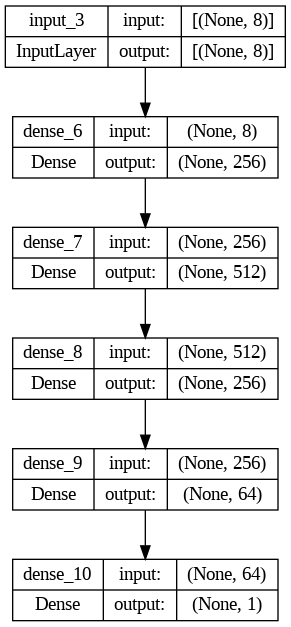

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model , show_shapes=True)

In [49]:
model.compile( loss = "mae")

In [51]:
model.fit(X_train,y_train, epochs = 100 )

Epoch 1/100
399/399 [==============================] - 4s 10ms/step - loss: 44221.1836
Epoch 2/100
399/399 [==============================] - 2s 6ms/step - loss: 43863.6875
Epoch 3/100
399/399 [==============================] - 2s 6ms/step - loss: 43506.6797
Epoch 4/100
399/399 [==============================] - 2s 6ms/step - loss: 43214.5859
Epoch 5/100
399/399 [==============================] - 3s 7ms/step - loss: 42832.1289
Epoch 6/100
399/399 [==============================] - 4s 9ms/step - loss: 42673.3828
Epoch 7/100
399/399 [==============================] - 2s 6ms/step - loss: 42416.8242
Epoch 8/100
399/399 [==============================] - 2s 6ms/step - loss: 42274.0234
Epoch 9/100
399/399 [==============================] - 2s 6ms/step - loss: 42037.2617
Epoch 10/100
399/399 [==============================] - 3s 6ms/step - loss: 41849.4375
Epoch 11/100
399/399 [==============================] - 4s 10ms/step - loss: 41702.4844
Epoch 12/100
399/399 [============================

In [52]:
pred = model.predict(X_test)
model.evaluate(X_test,y_test)

133/133 [==============================] - 0s 2ms/step - loss: 34887.2266


34887.2265625

In [53]:
pred

array([[ 61035.395],
       [135734.77 ],
       [ 59037.383],
       ...,
       [249337.17 ],
       [175585.58 ],
       [151565.42 ]], dtype=float32)